In [1]:
from customtree import *
from customtreeplot import *

In [2]:
p=1669
A = [1, p-1] + [p<<i for i in range(p.bit_length())]
HA = H(A)
fldr_tree = gen_fldr_tree(A)
depth_min = tree_depth(fldr_tree)
ky_tree = gen_ky_tree(A)
depth_max = tree_depth(ky_tree)
HA = H(A)
ky_toll = get_tree_entropy(ky_tree) - HA

# Compute the ALDR tree tolls.
depth_range = list(range(depth_min, depth_max+1))
tree_tolls = [get_tree_entropy(gen_fldr_tree(A, depth)) - HA for depth in depth_range]

In [3]:
# Find the point where entropy dips below 2.
below_2 = min([i for i,t in enumerate(tree_tolls) if t<2])
above_2 = max([i for i,t in enumerate(tree_tolls) if t>2])
assert above_2 == below_2 - 1

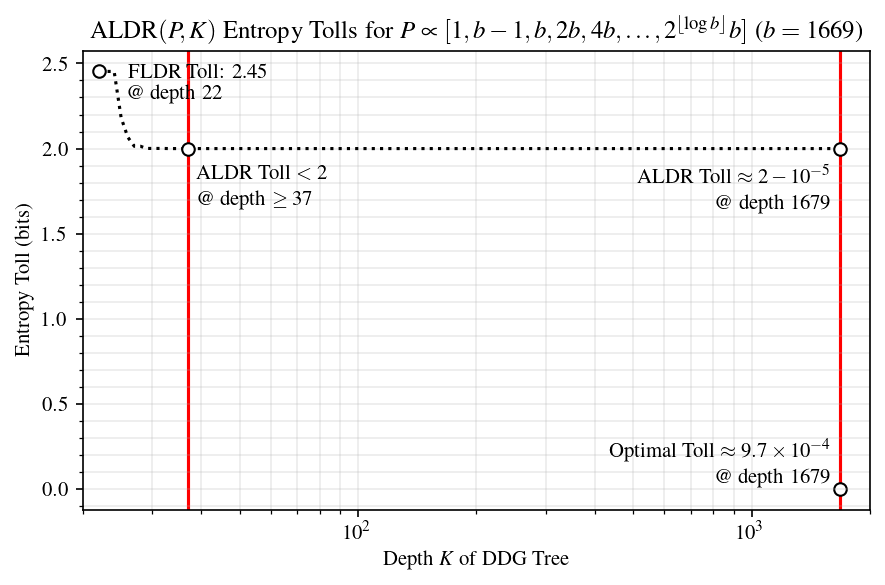

In [4]:
fig, ax = plt.subplots(dpi=150)

ax.set_title(r'$\mathrm{ALDR}(P,K)$ Entropy Tolls for $P \propto [1,b-1,b,2b,4b,\dots,2^{\lfloor\log b\rfloor}b]$ ($b = 1669$)')
ax.set_xlabel(r'Depth $K$ of DDG Tree')
ax.set_ylabel('Entropy Toll (bits)')

ax.plot(depth_range, tree_tolls, label='ALDR', color='k', linestyle=':')
ax.scatter([depth_max], [ky_toll], marker='o', color='k', facecolor='white', label='Optimal Method')
ax.scatter(
    [depth_range[0], depth_range[below_2], depth_range[-1]],
    [tree_tolls[0], tree_tolls[below_2], tree_tolls[-1]],
    marker='o', color='k', facecolor='white', zorder=10)

# TODO: Entropies are hard-coded for LaTeX strings.
ax.text(0.95*depth_max, 10*ky_toll, r'\begin{tabular}{@{}r}Optimal Toll $\approx 9.7\times10^{-4}$\\@ depth %s\end{tabular}' % (depth_max,), va='bottom', ha='right')
ax.text(0.95*depth_max, 0.95*tree_tolls[-1], r'\begin{tabular}{@{}r}ALDR Toll $\approx 2-10^{-5}$\\@ depth %s\end{tabular}' % (depth_max,), va='top', ha='right')
ax.text(depth_range[0]+4, 0.97*tree_tolls[0], f'FLDR Toll: {tree_tolls[0]:.2f}\n@ depth {depth_range[0]}', va='center', ha='left')
ax.text(1.05*depth_range[below_2], 0.95*tree_tolls[below_2], r'\begin{tabular}{@{}l}ALDR Toll $< 2$\\@ depth $\ge %s$\end{tabular}' % (depth_range[below_2],), va='top', ha='left')

ax.xaxis.set_major_locator(ticker.LogLocator(base=10, subs='all', numticks=100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.grid(which='both', alpha=0.25)
ax.axvline(depth_max,color='red', zorder=-1)
ax.axvline(depth_range[below_2],color='red', zorder=-1)

ax.set_xscale('log', base=10)
ax.set_xlim([20, 2000])

fig.set_size_inches(6, 4)
fig.set_tight_layout(True)
fig.savefig(output_dir / 'aldr-tolls-1669.png')
# Depth 21: FLDR toll: 2.4529622941 bits, KY toll: 0.0009730088 bits, difference: 2.4519892853 bits